# Exercise for gamma function

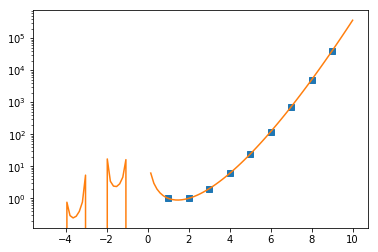

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special

MIN=1
MAX=10
x = np.linspace(-MAX/2, MAX, 100)
n = range(MIN, MAX)

plt.plot(n, special.factorial(n, exact=True)/n, 's')
plt.plot(x, special.gamma(x), '-')

plt.yscale("log")


# Integral

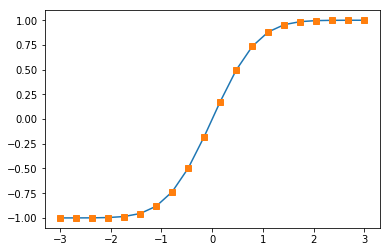

In [39]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np
from scipy import special

def f(x) :
    return 2*np.exp(-x ** 2)/np.sqrt(np.pi)

def erf(x) :
    val, abserr = quad(f, 0, x)
    return val

x = np.linspace(-3, 3, 20)
vec = np.vectorize(erf)
plt.plot(x, special.erf(x))
plt.plot(x, vec(x), 's')

# Reactors

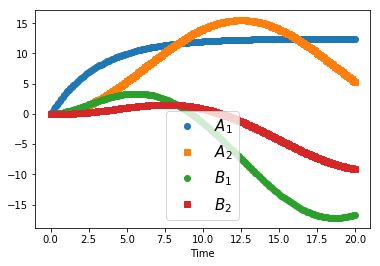

In [43]:
# global imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# global parameters
TAU = 5
K = 0.12

# initial conditions
A0 = 20
A1 = 0
A2 = 0
B1 = 0
B2 = 0

# function to return the derivatives
def derivatives(state, t): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    dev0 = (A0 - state[0])/TAU - K*state[0]
    dev1 = (state[2])/TAU + K*state[0]
    dev2 = (state[0] - state[1])/TAU - K*state[1]
    dev3 = (state[2] - state[3])/TAU - K*state[3]
    return dev0, dev1, dev2, dev3

# solving the differential equation
state0 = np.array([A1, A2, B1, B2])
t = np.linspace(0, 20, 200) # dt = 0.1
state = odeint(derivatives, state0, t)

# Plot the solution
plt.plot(t, state[:,0], 'o', label=r"$A_1$")
plt.plot(t, state[:,1], 's', label=r"$A_2$")
plt.plot(t, state[:,2], 'o', label=r"$B_1$")
plt.plot(t, state[:,3], 's', label=r"$B_2$")
plt.xlabel('Time')
plt.legend(fontsize=15)